# 1º ENTREGA DO TRABALHO EM GRUPO
**Salif Faustino - 20172005|Pedro Sousa - 2019101451**

## Exploração, Pré-processamento e Validação

In [49]:
#importar as bibliotecas necessárias para fazer a exploração, pré-processamento e validação dos dados.
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

In [50]:
dados = pd.read_csv('notificacoes-covid19-mg.csv',encoding = "ISO-8859-1", delimiter=";", decimal=",", nrows=500, header=0,index_col=0)

In [51]:
dados

,ID,CONTADOR,DATA_NOTIFICACAO,CLASSIFICACAO_CASO,SEXO,IDADE,FAIXA_ETARIA,MUNICIPIO_RESIDENCIA_COD,MUNICIPIO_RESIDENCIA,COMORBIDADE,EVOLUCAO,INTERNACAO,UTI,DATA_ATUALIZACAO
1,1,296297,04/03/2020,Caso Confirmado,Feminino,38,30 a 39 anos,313130.0,IPATINGA,Não Informado,RECUPERADO,NÃO,NÃO,25/06/2020
2,2,296298,07/03/2020,Caso Confirmado,Feminino,47,40 a 49 anos,312230.0,DIVINÓPOLIS,Não Informado,RECUPERADO,NÃO,NÃO,25/06/2020
3,3,296299,14/03/2020,Caso Confirmado,Masculino,65,60 a 69 anos,313670.0,JUIZ DE FORA,SIM,RECUPERADO,SIM,SIM,25/06/2020
4,4,296300,14/03/2020,Caso Confirmado,Feminino,37,30 a 39 anos,314810.0,PATROCÍNIO,Não Informado,RECUPERADO,NÃO,NÃO,25/06/2020
5,5,296301,16/03/2020,Caso Confirmado,Masculino,45,40 a 49 anos,310620.0,BELO HORIZONTE,Não Informado,RECUPERADO,NÃO,NÃO,25/06/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,503,296792,05/04/2020,Caso Confirmado,Feminino,64,60 a 69 anos,310620.0,BELO HORIZONTE,SIM,RECUPERADO,SIM,NÃO,25/06/2020
497,504,296793,13/04/2020,Caso Confirmado,Masculino,78,70 a 79 anos,315150.0,PIUMHI,SIM,OBITO,SIM,SIM,25/06/2020
498,505,296794,05/04/2020,Caso Confirmado,Feminino,67,60 a 69 anos,313670.0,JUIZ DE FORA,SIM,RECUPERADO,SIM,NÃO,25/06/2020
499,506,296795,05/04/2020,Caso Confirmado,Masculino,36,30 a 39 anos,314800.0,PATOS DE MINAS,NÃO,RECUPERADO,SIM,NÃO,25/06/2020


<p>ID = número identificador do caso<p>
<p>CONTADOR = número de pessoa testada no Brasil</p>
<p>DATA_NOTIFICACAO = data de notificação do resultado do teste</p>
<p>CLASSIFICACAO_CASO = se o teste é confirmado ser positivo ou não</p>
<p>SEXO = género da pessoa (masculino ou feminino)</p>
<p>FAIXA_ETARIA = faixa etária da pessoa testada</p>
<p>MUNICIPIO_RESIDENCIA_COD = número médio de pessoas no município de residência</p>
<p>MUNICIPIO_RESIDENCIA = município de residência da pessoa</p>
<p>COMORBIDADE = se a pessoa tem comorbidade prognóstica</p>
<p>EVOLUCAO = evolução do estado da pessoa no momento da data de obtenção dos dados</p>
<p>INTERNACAO = se a pessoa esteve internada ou não</p>
<p>UTI = se a pessoa esteve numa unidade de tratamento intensivo</p>
<p>DATA_ATUALIZACAO = data de obtenção dos dados anteriores (único valor, 25/06/2020)</p>

# Descrição dos dados

In [52]:
dados.describe()

,ID,CONTADOR,IDADE,MUNICIPIO_RESIDENCIA_COD
count,500.000000,500.000000,500.000000,493.00000
mean,252.130000,296546.500000,45.936000,312459.64503
std,146.508945,144.481833,16.634582,2327.08741
min,1.000000,296297.000000,0.000000,310160.00000
25%,125.750000,296421.750000,34.000000,310620.00000
50%,250.500000,296546.500000,42.000000,310620.00000
75%,380.250000,296671.250000,58.000000,314480.00000
max,507.000000,296796.000000,94.000000,317100.00000


<p> Mostra  a discrção de todos atributos númericos </p>

In [53]:
# números de individuos infetados do sexo masculino e feminino
dados_sexo = dados["SEXO"].value_counts()
#dados_sexo

<p>Neste Gráfico indicamos as percentagens das pessoas infectadas com o coronavirus, onde, podemos obsevar que os individuos do sexo masculino apresentam maior percentagem  de infecção em relação aos individuos do sexo  feminino.</p>

Text(0.5, 1.0, 'Número de infectados pelo coronavírus: 500')

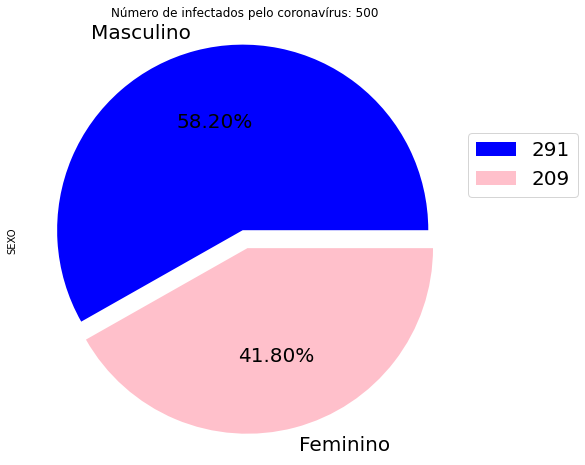

In [54]:
explode = (0.1, 0)
# Com Pandas
dados.SEXO.value_counts().plot(kind='pie',explode=explode, autopct='%.2f%%',figsize=(8,8),fontsize=20,colors = ['blue', 'pink'] )
plt.axis('equal')  # Para deixar o gráfico circular
# criar a legenda do gráfico. a legenda indica o mês e a cor no gráfico
plt.legend(dados_sexo, loc=(1, 0.6),fontsize=20)
plt.title("Número de infectados pelo coronavírus: "+ str(dados.iloc[-1].name))


In [55]:
#lista com as datas de notificação
lista_datas = dados["DATA_NOTIFICACAO"].tolist()
lista_datas

['04/03/2020',
 '07/03/2020',
 '14/03/2020',
 '14/03/2020',
 '16/03/2020',
 '16/03/2020',
 '16/03/2020',
 '16/03/2020',
 '17/03/2020',
 '17/03/2020',
 '17/03/2020',
 '17/03/2020',
 '17/03/2020',
 '17/03/2020',
 '17/03/2020',
 '18/03/2020',
 '18/03/2020',
 '18/03/2020',
 '18/03/2020',
 '18/03/2020',
 '18/03/2020',
 '18/03/2020',
 '19/03/2020',
 '15/04/2020',
 '19/03/2020',
 '19/03/2020',
 '19/03/2020',
 '19/03/2020',
 '20/03/2020',
 '20/03/2020',
 '20/03/2020',
 '20/03/2020',
 '20/03/2020',
 '20/03/2020',
 '20/03/2020',
 '20/03/2020',
 '20/03/2020',
 '20/03/2020',
 '20/03/2020',
 '20/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/20

In [56]:
#lista com as datas ordenadas
dates = [datetime.datetime.strptime(ts, "%d/%m/%Y") for ts in lista_datas]
dates.sort()
sorteddates = [datetime.datetime.strftime(ts, "%d/%m/%Y") for ts in dates]
sorteddates

['04/03/2020',
 '07/03/2020',
 '14/03/2020',
 '14/03/2020',
 '16/03/2020',
 '16/03/2020',
 '16/03/2020',
 '16/03/2020',
 '17/03/2020',
 '17/03/2020',
 '17/03/2020',
 '17/03/2020',
 '17/03/2020',
 '17/03/2020',
 '17/03/2020',
 '18/03/2020',
 '18/03/2020',
 '18/03/2020',
 '18/03/2020',
 '18/03/2020',
 '18/03/2020',
 '18/03/2020',
 '19/03/2020',
 '19/03/2020',
 '19/03/2020',
 '19/03/2020',
 '19/03/2020',
 '20/03/2020',
 '20/03/2020',
 '20/03/2020',
 '20/03/2020',
 '20/03/2020',
 '20/03/2020',
 '20/03/2020',
 '20/03/2020',
 '20/03/2020',
 '20/03/2020',
 '20/03/2020',
 '20/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/2020',
 '21/03/20

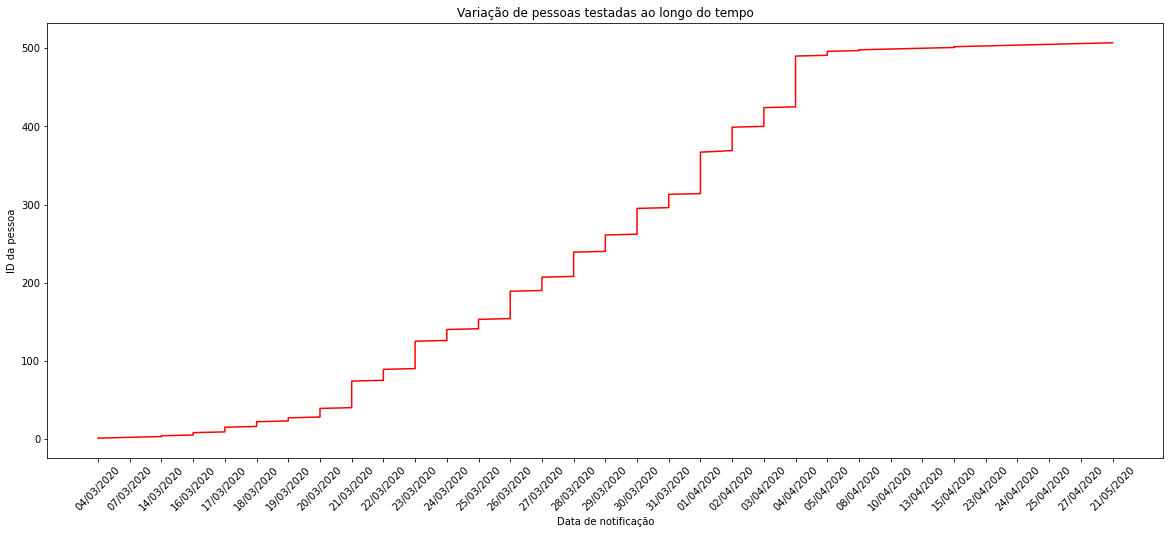

In [57]:
fig, ax = plt.subplots(figsize=(20,8))
ax.set(xlabel = "Data de notificação", ylabel = "ID da pessoa", title = "Variação de pessoas testadas ao longo do tempo")
plt.setp(ax.get_xticklabels(), rotation=45)
ax.plot(sorteddates, dados["ID"], color = "red")

<p>Este gráfico mostra o número de pessoas testadas ao logo do tempo, onde podemos observar que o crescimento é exponencial.</p>

In [58]:
# números de individuos infetados do sexo masculino e feminino por faixa etária 
dados_faixa = dados["FAIXA_ETARIA"].value_counts().sort_index()
#dados_faixa

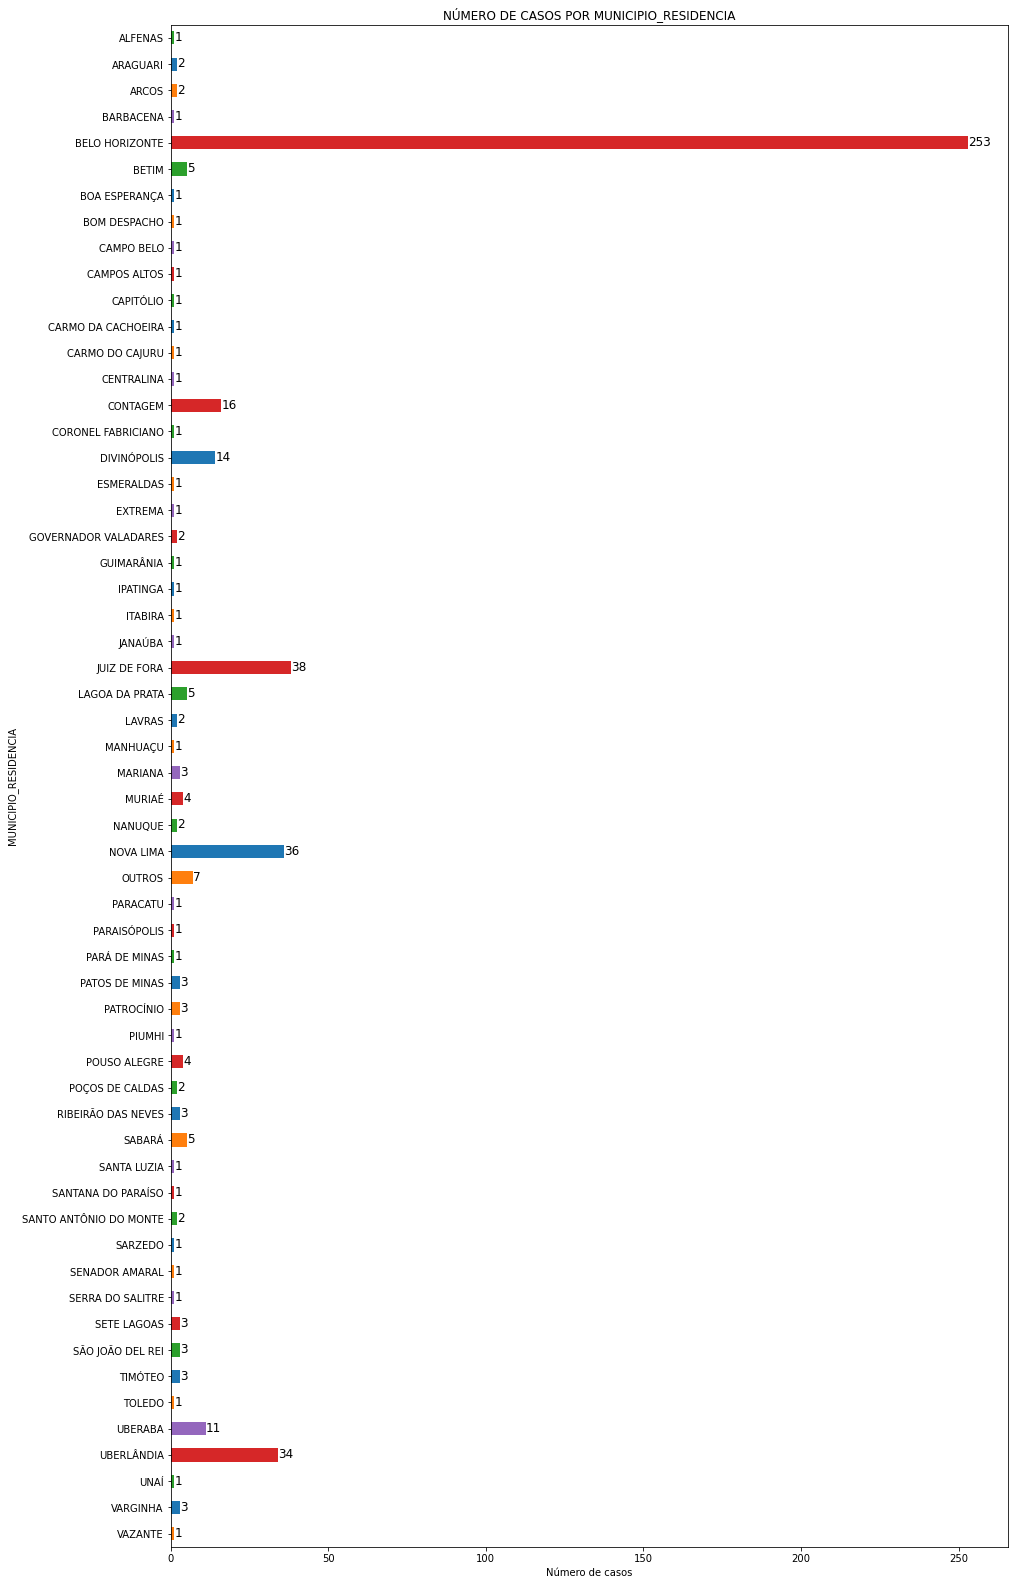

In [59]:
#Número de casos por faixa etária
# No eixo y temos a faixa etária e no eixo x temos o número de casos

df = dados["MUNICIPIO_RESIDENCIA"].value_counts(ascending=False).sort_index(ascending=False)
ax=df.plot.barh(color=['C1', 'C0', 'C2', 'C3', 'C4'],figsize=(15,28))
ax.set(xlabel = "Número de casos", ylabel = "MUNICIPIO_RESIDENCIA", title = "NÚMERO DE CASOS POR MUNICIPIO_RESIDENCIA")
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.14, \
            str(round((i.get_width()), 4)), fontsize=12, color="black")



In [60]:
dados['DATA_NOTIFICACAO']=pd.to_datetime(dados['DATA_NOTIFICACAO'],format='%d/%m/%Y')
dados.index=dados['DATA_NOTIFICACAO']


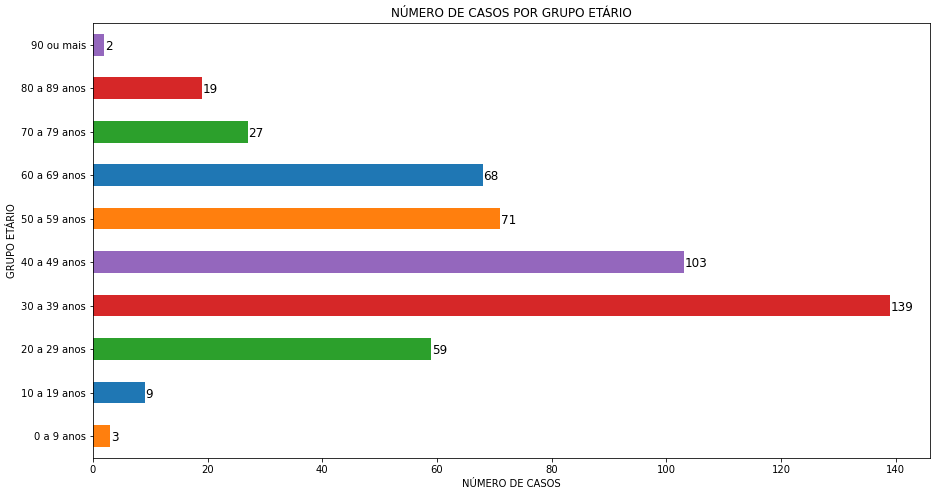

In [61]:
#Número de casos por faixa etária
# No eixo y temos a faixa etária e no eixo x temos o número de casos

df = dados["FAIXA_ETARIA"].value_counts().sort_index()
ax=df.plot.barh(color=['C1', 'C0', 'C2', 'C3', 'C4'],figsize=(15,8))
ax.set(xlabel = "NÚMERO DE CASOS", ylabel = "GRUPO ETÁRIO", title = "NÚMERO DE CASOS POR GRUPO ETÁRIO")
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.14, \
            str(round((i.get_width()), 4)), fontsize=12, color="black")

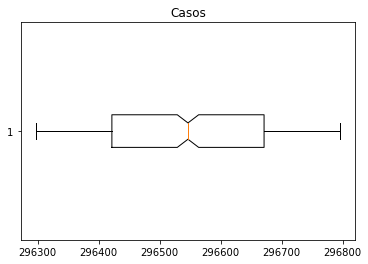

In [62]:
# basic plot
from matplotlib.patches import Polygon
fig, axs = plt.subplots()
axs.boxplot(dados["CONTADOR"], 1, 'rs', 0)
axs.set_title('Casos')
plt.show()

Text(0.5, 1.0, 'Violin plot')

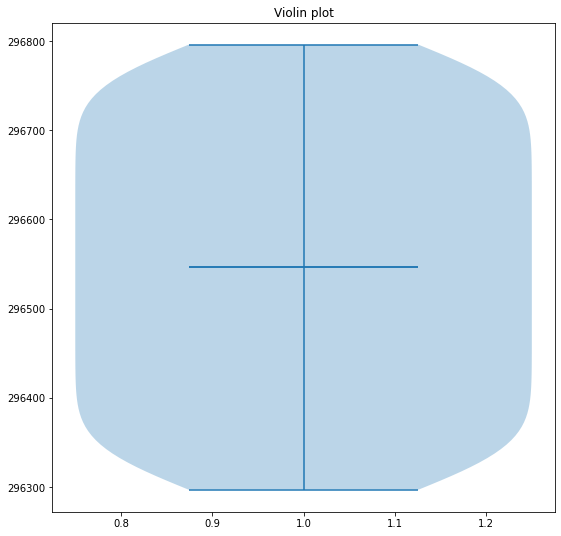

In [63]:
#gráfico violino
fig, axes = plt.subplots(figsize=(9, 9))
axes.violinplot(dados["CONTADOR"],
                   showmeans=True,
                   showmedians=True)
axes.set_title('Violin plot')

<BarContainer object of 3 artists>

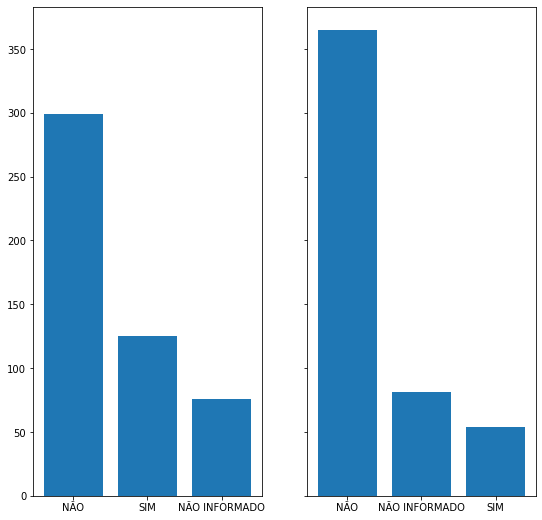

In [64]:
#bar plot para comparar internamentos com cuidados intensivos
fig, axs = plt.subplots(1,2,figsize=(9, 9), sharey=True)
G=dados["INTERNACAO"].value_counts()
G1=dados["UTI"].value_counts()
axs[0].bar(G.keys(),G )
axs[1].bar(G1.keys(),G1 )

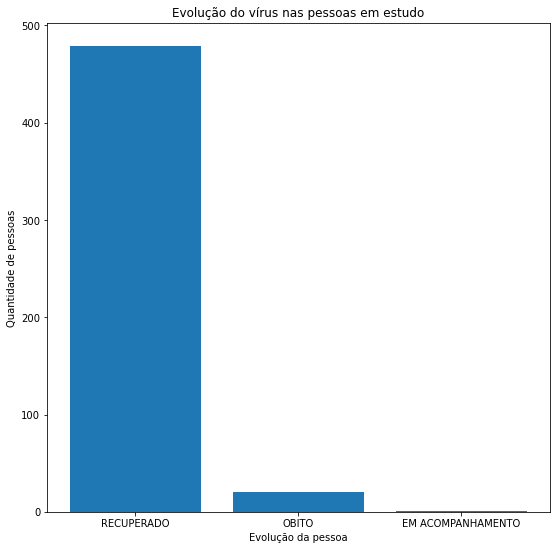

In [65]:
fig, axs = plt.subplots(figsize=(9, 9), sharey=True)
E=dados["EVOLUCAO"].value_counts()
axs.bar(E.keys(),E )
axs.set_xlabel("Evolução da pessoa") 
axs.set_ylabel("Quantidade de pessoas") 
axs.set_title("Evolução do vírus nas pessoas em estudo")
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.1, i.get_y()+.14, \
            str(round((i.get_width()), 4)), fontsize=12, color="red")

<p>Este gráfico ilustra  a evoluçãao dos virus, onde podemos observar que temos um número de recuperados bastante considerável.</p>

<p>Mas bom era que não tivessemos mortos. </p>

# 3 RAC

## 1.2 pré-processamento: tornar tudo numérico

<p> Como os dados tem um identificador não há neccessidade de criar o índex com a chave</p>

In [66]:
# verificar os tipos de atributos
dados.describe(include='all')

<ipython-input-66-212299a51100>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  dados.describe(include='all')


,ID,CONTADOR,DATA_NOTIFICACAO,CLASSIFICACAO_CASO,SEXO,IDADE,FAIXA_ETARIA,MUNICIPIO_RESIDENCIA_COD,MUNICIPIO_RESIDENCIA,COMORBIDADE,EVOLUCAO,INTERNACAO,UTI,DATA_ATUALIZACAO
count,500.000000,500.000000,500,500,500,500.000000,500,493.00000,500,500,500,500,500,500
unique,NaN,NaN,33,1,2,NaN,10,NaN,58,3,3,3,3,1
top,NaN,NaN,2020-04-04 00:00:00,Caso Confirmado,Masculino,NaN,30 a 39 anos,NaN,BELO HORIZONTE,Não Informado,RECUPERADO,NÃO,NÃO,25/06/2020
freq,NaN,NaN,65,500,291,NaN,139,NaN,253,338,479,299,365,500
first,NaN,NaN,2020-03-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2020-05-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,252.130000,296546.500000,NaN,NaN,NaN,45.936000,NaN,312459.64503,NaN,NaN,NaN,NaN,NaN,NaN
std,146.508945,144.481833,NaN,NaN,NaN,16.634582,NaN,2327.08741,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,296297.000000,NaN,NaN,NaN,0.000000,NaN,310160.00000,NaN,NaN,NaN,NaN,NaN,NaN
25%,125.750000,296421.750000,NaN,NaN,NaN,34.000000,NaN,310620.00000,NaN,NaN,NaN,NaN,NaN,NaN


SyntaxError: invalid syntax (<ipython-input-69-2aa6bd202123>, line 2)